# Introduction to grbalpha-tools
This notebook introduces basic usage of the *grbalpha-tools* package.

### 1. Check if an event was in satellite's FoV
This part is useful especially for GRBAlpha operations. At times, a lot of triggers come in short period of time and if this happens during days of lower passes, there might not be enough time to download all of the desired data. One way to eliminate some of the triggers is to remove those that were not in satellite's field of view.

To get this information, you can use the *Event* class and its function *in_fov*. The class *Event* takes in four parameters: time, type, right ascension and declination. 

As an example, let's look at a GRB triggered at 2023-03-10 00:45:01.130 by Fermi/GBM. The GRB coordinates are:
+ RA = 257.640°
+ Dec = -23.480°


In [1]:
# import Event class
from grbalpha_tools import Event

# define event parameters
event_time = '2023-03-10 00:45:01.130'
event_type = 'GRB-Fermi'
ra = 257.640
dec = -23.480

# check if event was in fov
Event(event_time,event_type,ra,dec).in_fov()

GRB-Fermi at 2023-03-10 00:45:01.130 in FoV: True


Sometimes, it can be useful to visualize the situation. You can create a skymap by setting *map=True* for function *in_fov*.

GRB-Fermi at 2023-03-10 00:45:01.130 in FoV: True


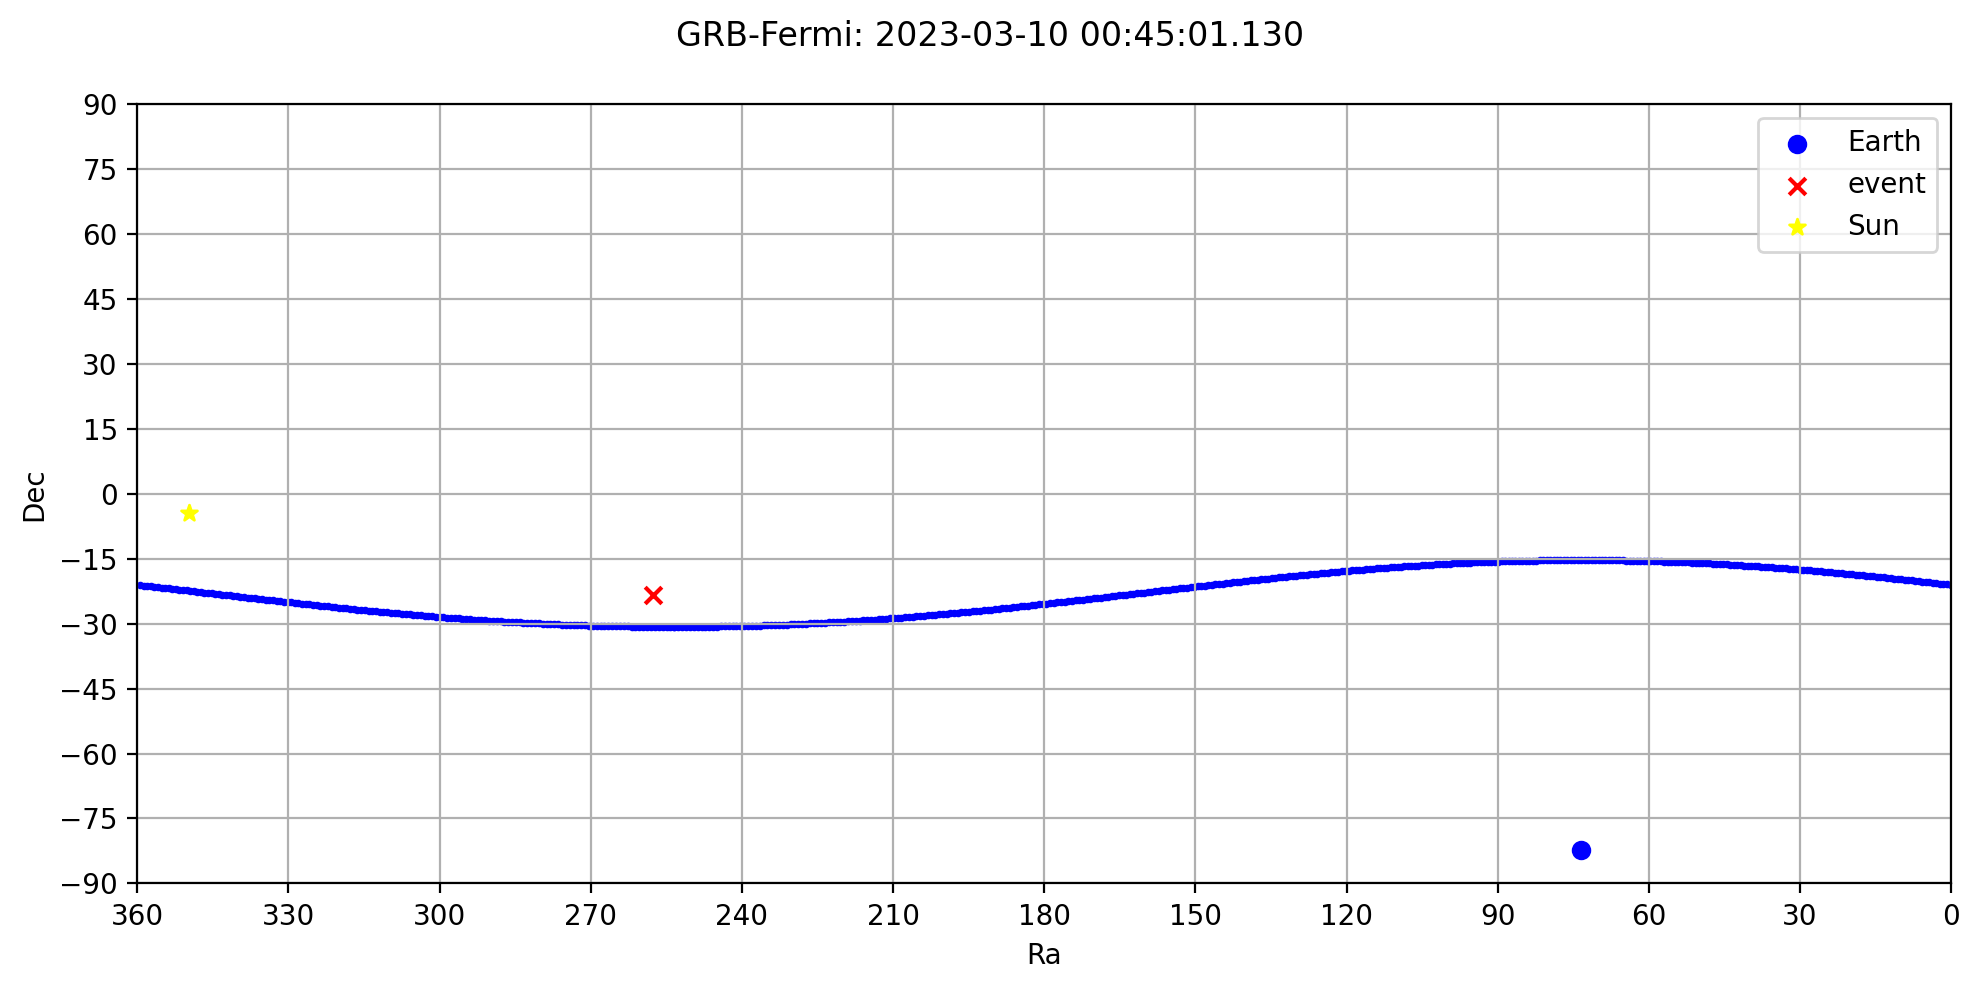

In [2]:
# check if event was in fov and create a skymap
Event(event_time,event_type,ra,dec).in_fov(map=True)

### 2. Check downloaded data

This part focuses on looking for detections in satellite's data. 

To check whether an event triggered by different satellite was detected, you can use the *Observation* class and its function *check_event*. The *Observation* class takes in only one parameter - the path to the file with data. The *check_event* function takes in following parameters:

+ *event_time*: time of the event/trigger in UTC
+ *event_type*: type of the event/triggered mission
+ *dtvalue_left*: number of minutes to plot before the trigger 
+ *dtvalue_right*: number of minutes to plot after the trigger 

Let's check the above-mentioned GRB 230310A.




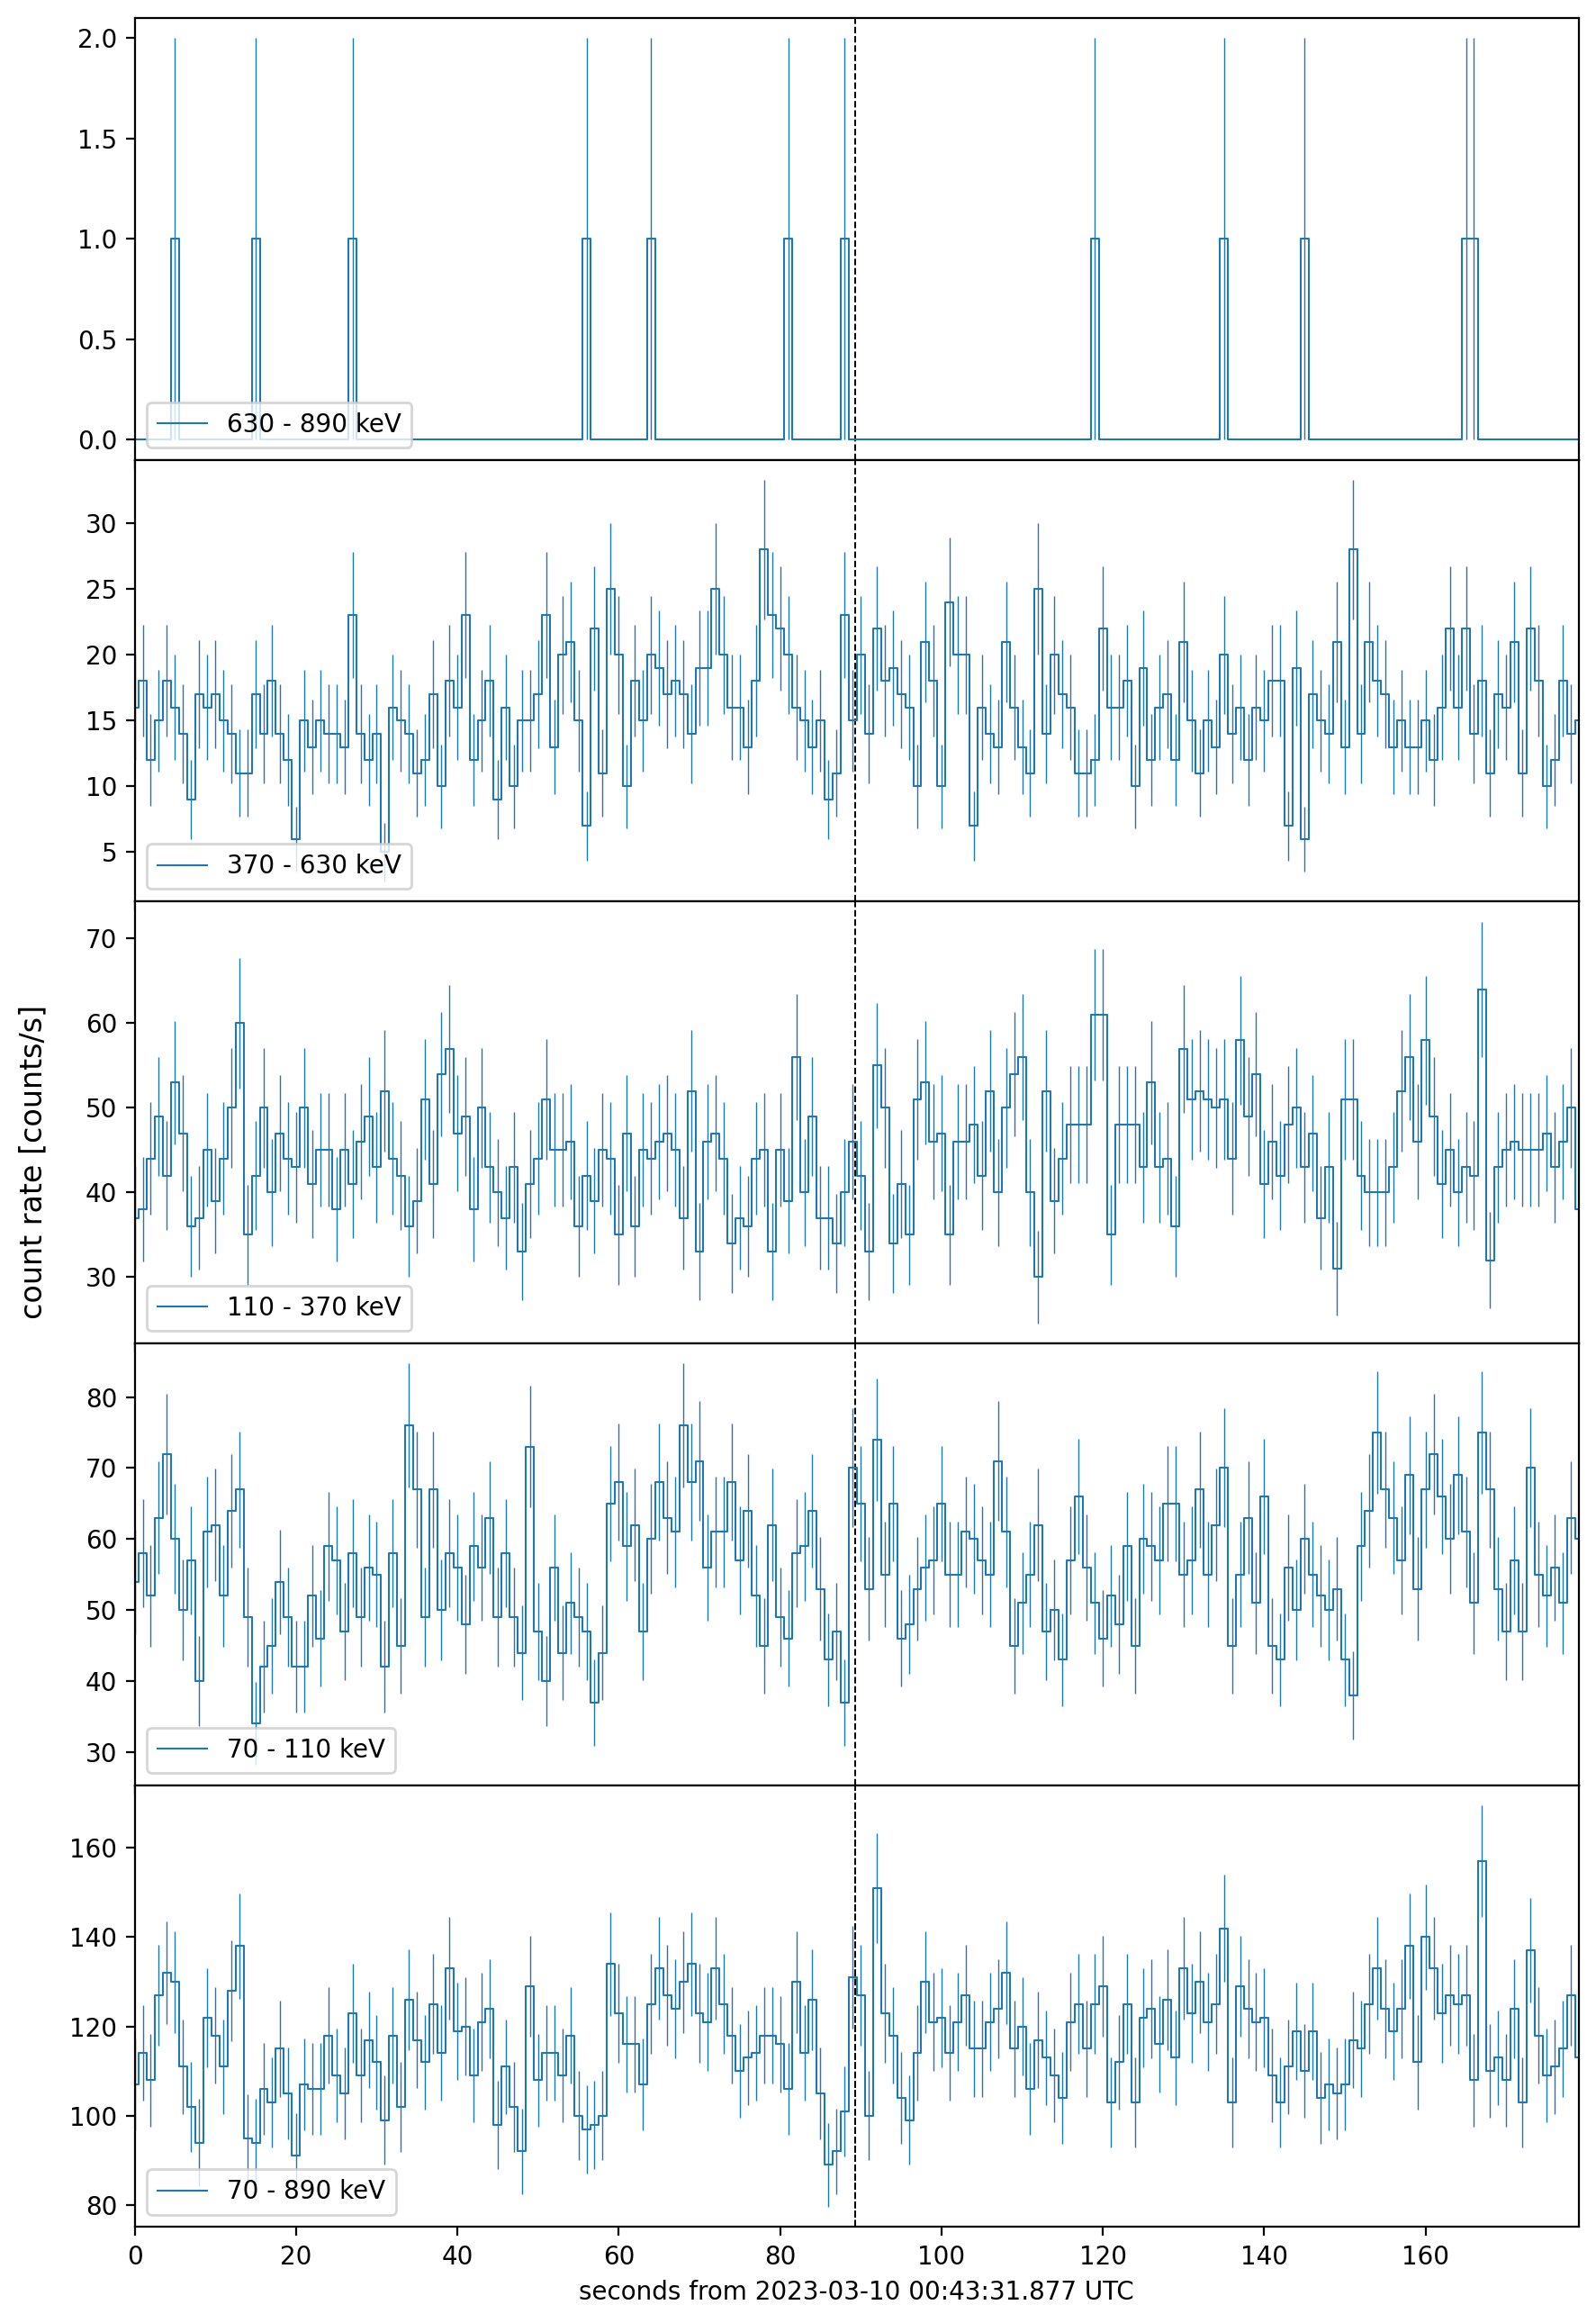

In [3]:
# import Observation class
from grbalpha_tools import Observation

# define filepath and create observation class
filepath = "../data/r23c10a_0.json"
obs = Observation(filepath)

# plot data +- 1.5 min around trigger
obs.check_event(event_time=event_time,
                event_type=event_type,
                dtvalue_left=1.5, dtvalue_right=1.5)

Unfortunately, this GRB was not detected by GRBAlpha.

Now, let's take a look at GRB 230304B.

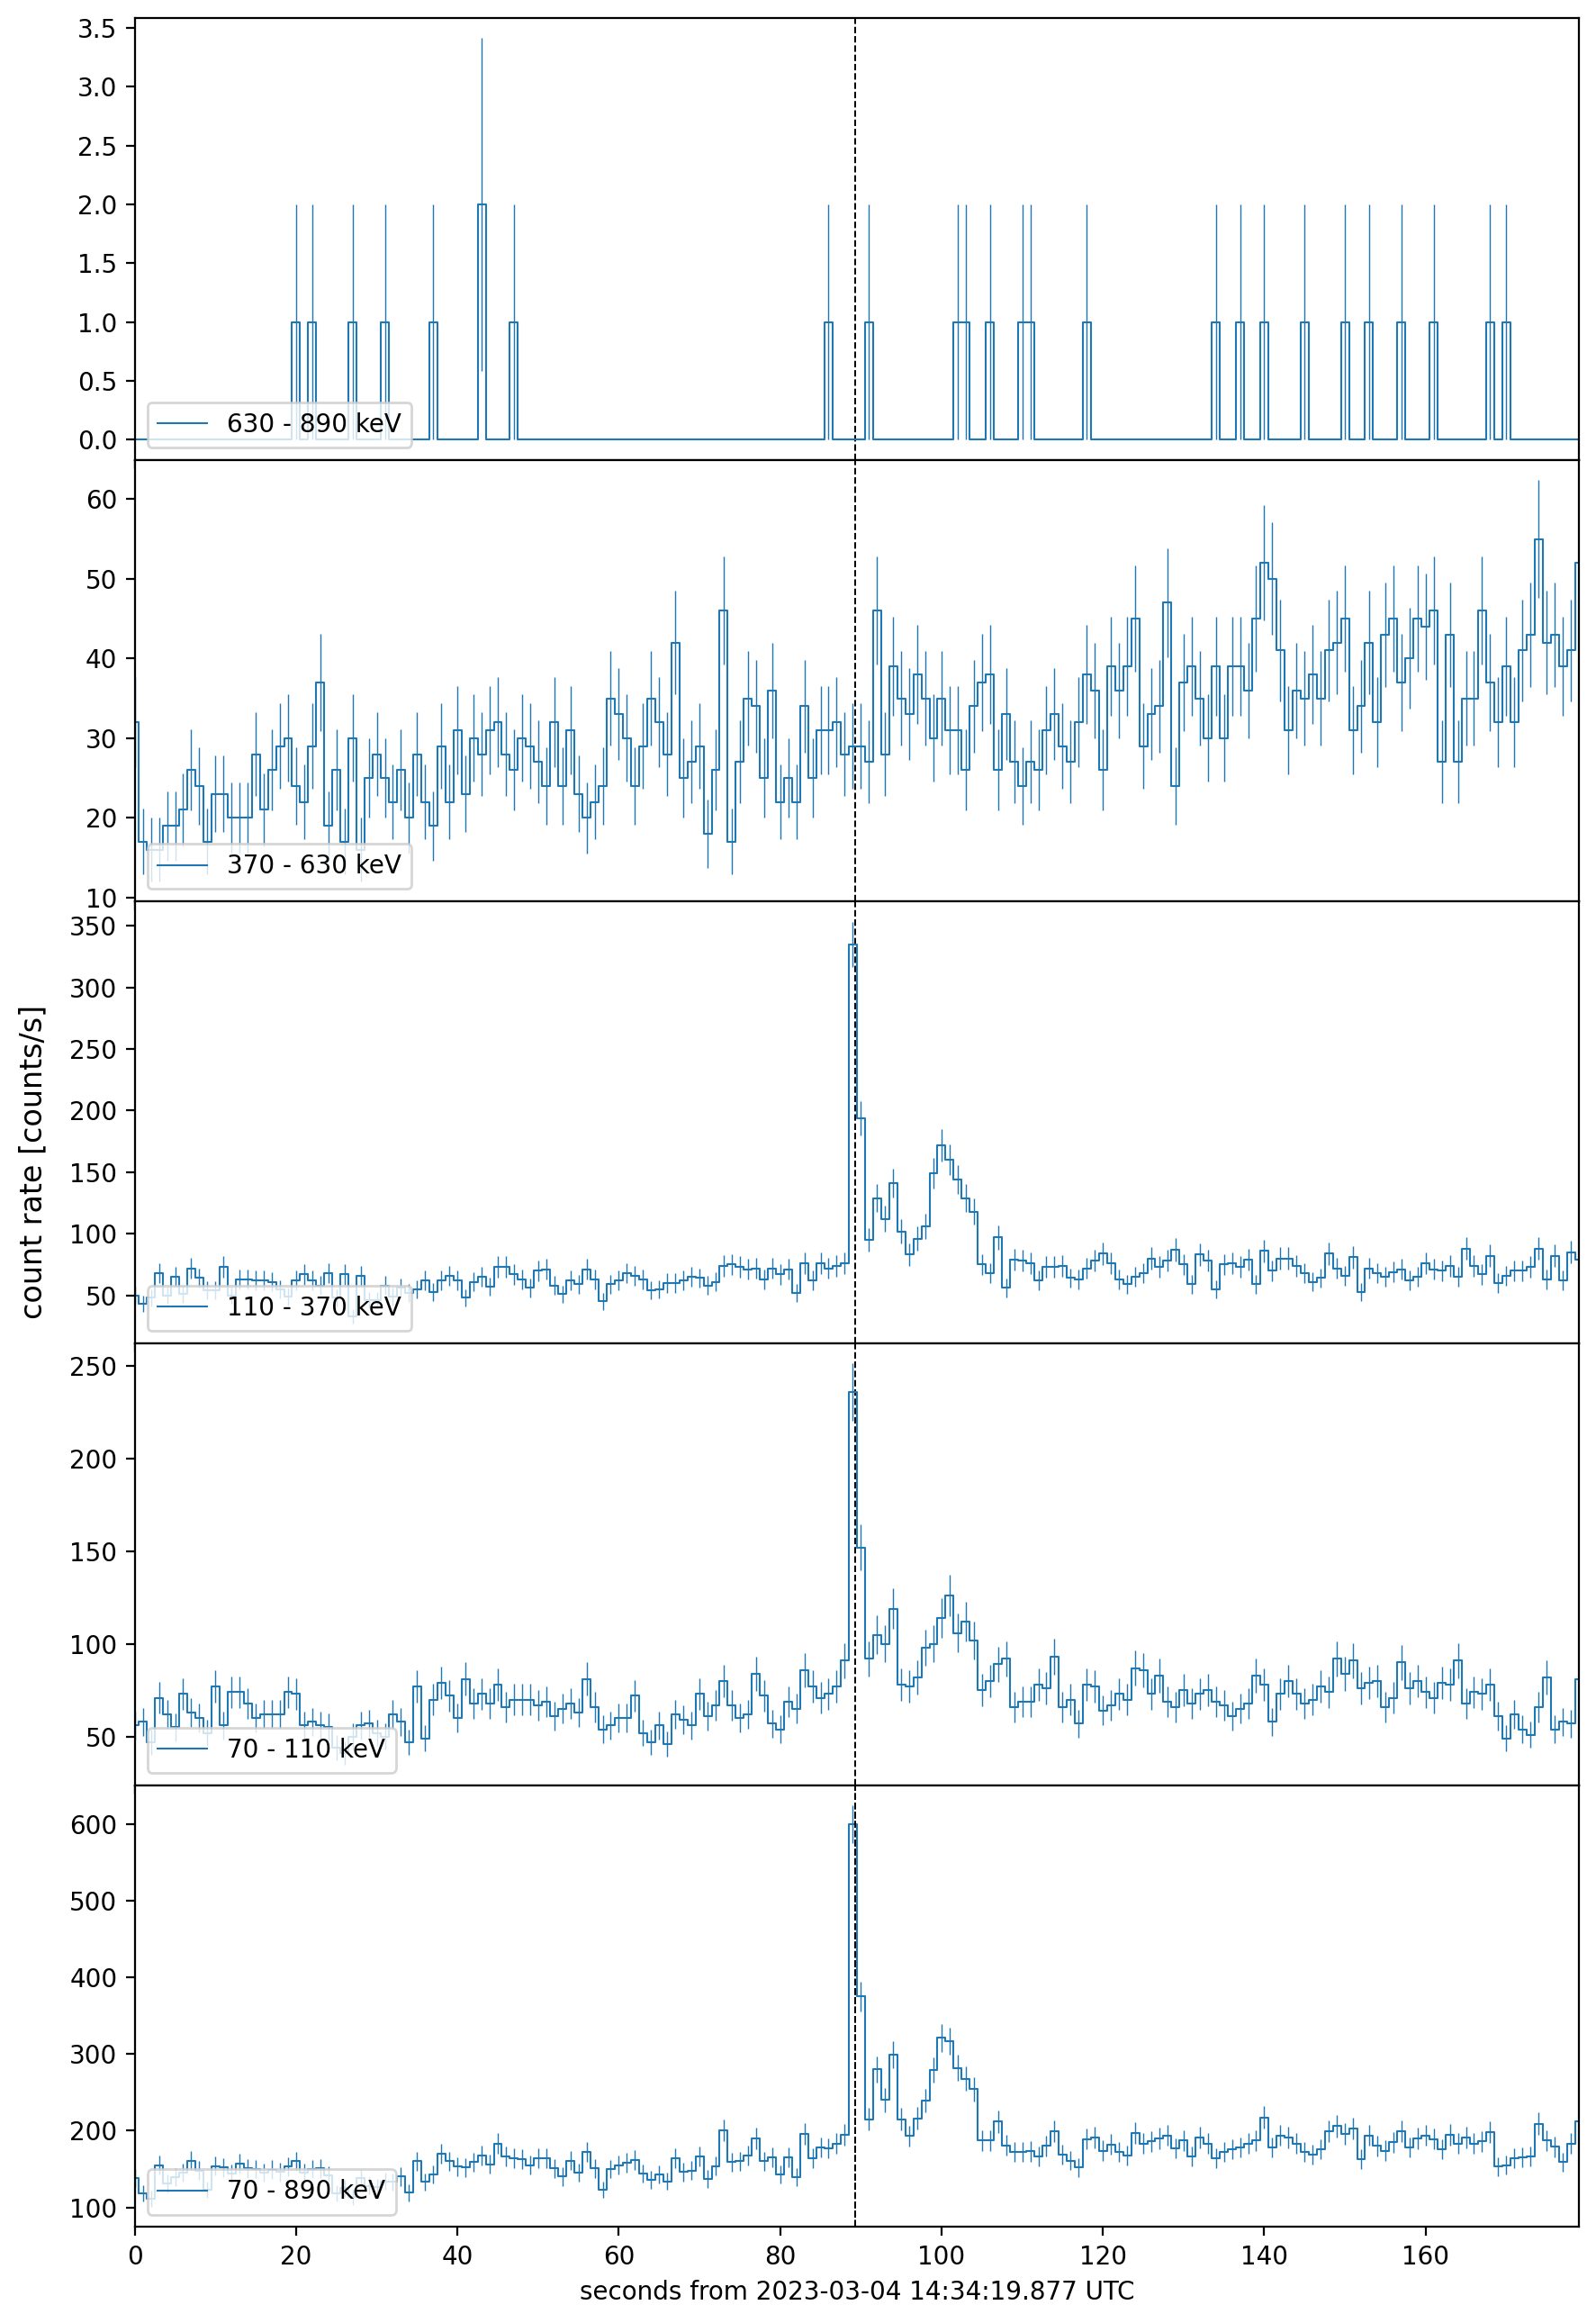

In [4]:
# define filepath and create observation class
filepath = '../data/r23c04b_40448.json'
obs = Observation(filepath)

# define event parameters
event_time = '2023-03-04 14:35:49.140'
event_type = 'GRB-Fermi'

# plot data +- 1.5 min around trigger
obs.check_event(event_time=event_time,
                event_type=event_type,
                dtvalue_left=1.5, dtvalue_right=1.5)

In this case, the detection is clear. To learn more about it, we can use more parameters of the *check_event* function. To create a background subtracted light curve and get statistics about the GRB, we need to set *plot_fit=True* and find the most suitable limits *llim* (left limit) and *rlim* (right limit) of the GRB. These two values are in "bin units", i.e. the number of bins from the beginning of the lightcurve. 


statistics in 70-370 keV for a GRB-Fermi at 2023-03-04 14:35:49.140000:
peak time [utc]: 2023-03-04 14:34:21.877646
SNR at peak: 18.307
count rate [cnt/s] above background at peak: 437.457 +- 23.896
T90 [s]: 16
SNR in T90: 29.808
counts above background in T90: 1938.891 +- 65.046

statistics in 70-890 keV for a GRB-Fermi at 2023-03-04 14:35:49.140000:
peak time [utc]: 2023-03-04 14:34:21.877646
SNR at peak: 17.764
count rate [cnt/s] above background at peak: 435.134 +- 24.495
T90 [s]: 16
SNR in T90: 28.18
counts above background in T90: 1949.938 +- 69.195

statistics in 630-890 keV for a GRB-Fermi at 2023-03-04 14:35:49.140000:
peak time [utc]: 2023-03-04 14:34:23.877646
SNR at peak: 0.859
count rate [cnt/s] above background at peak: 0.859 +- 1.0
T90 [s]: 16
SNR in T90: 0.297
counts above background in T90: 0.515 +- 1.732

statistics in 370-630 keV for a GRB-Fermi at 2023-03-04 14:35:49.140000:
peak time [utc]: 2023-03-04 14:34:24.877646
SNR at peak: 2.135
count rate [cnt/s] above back

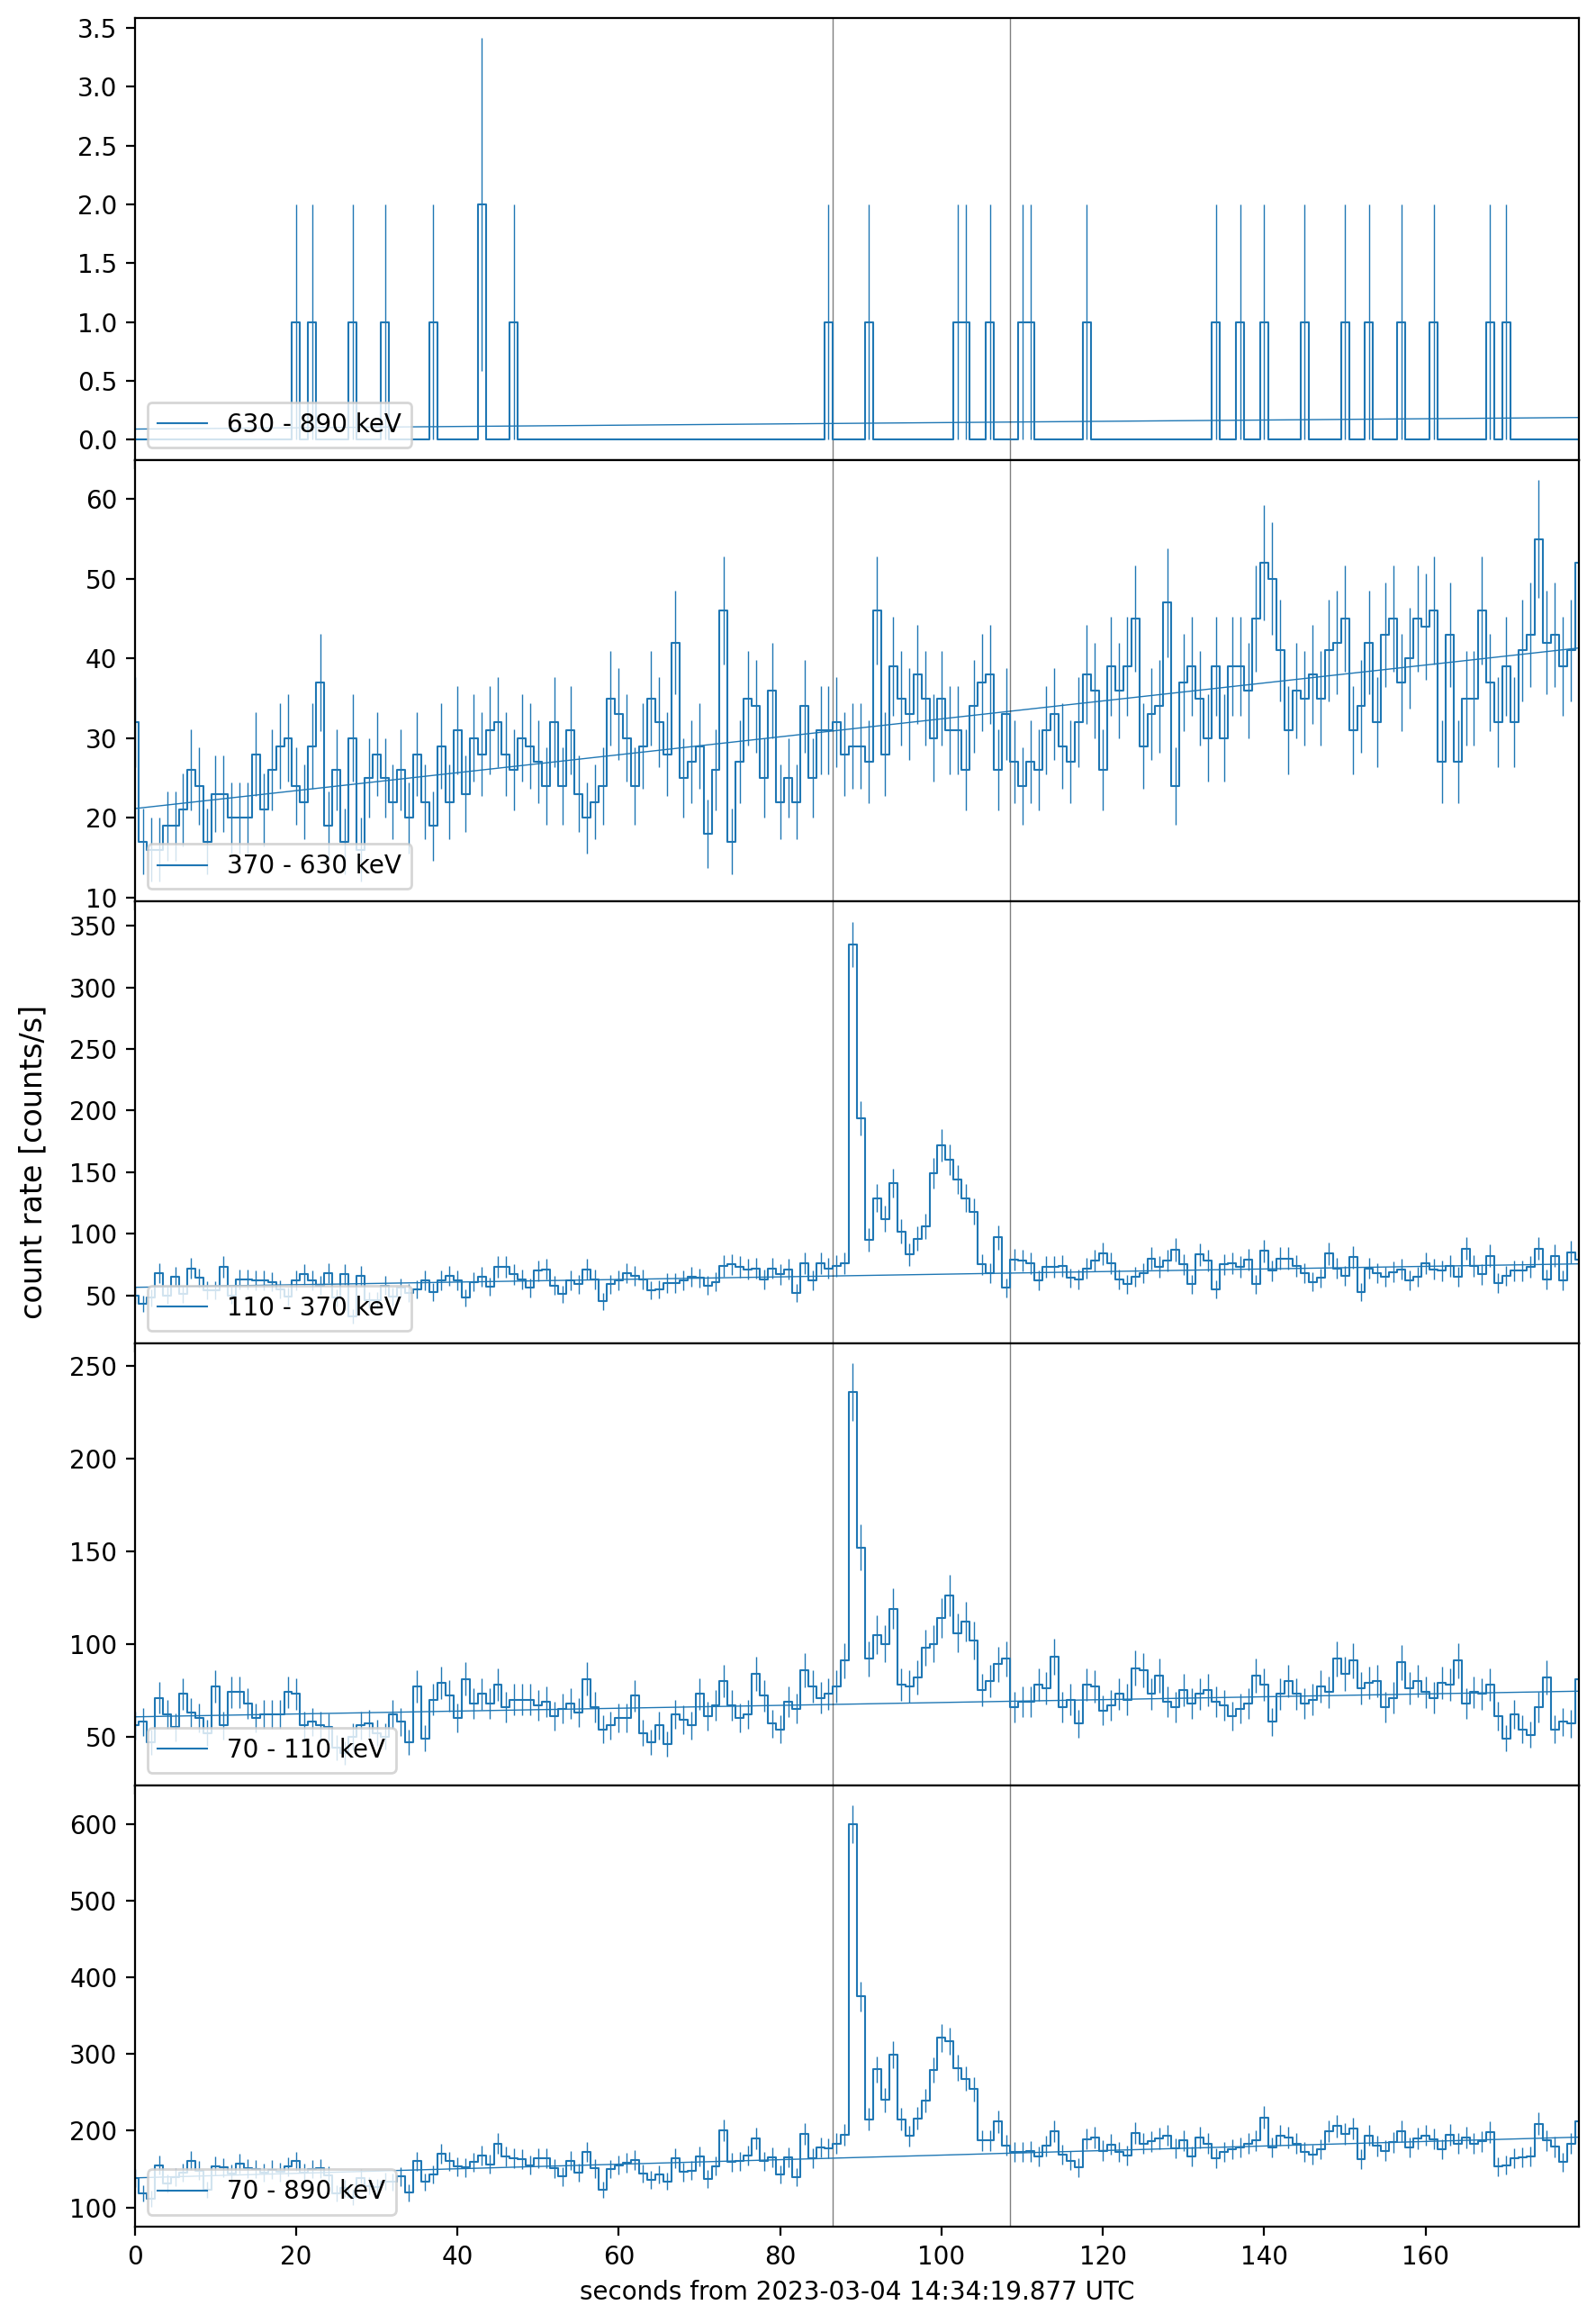

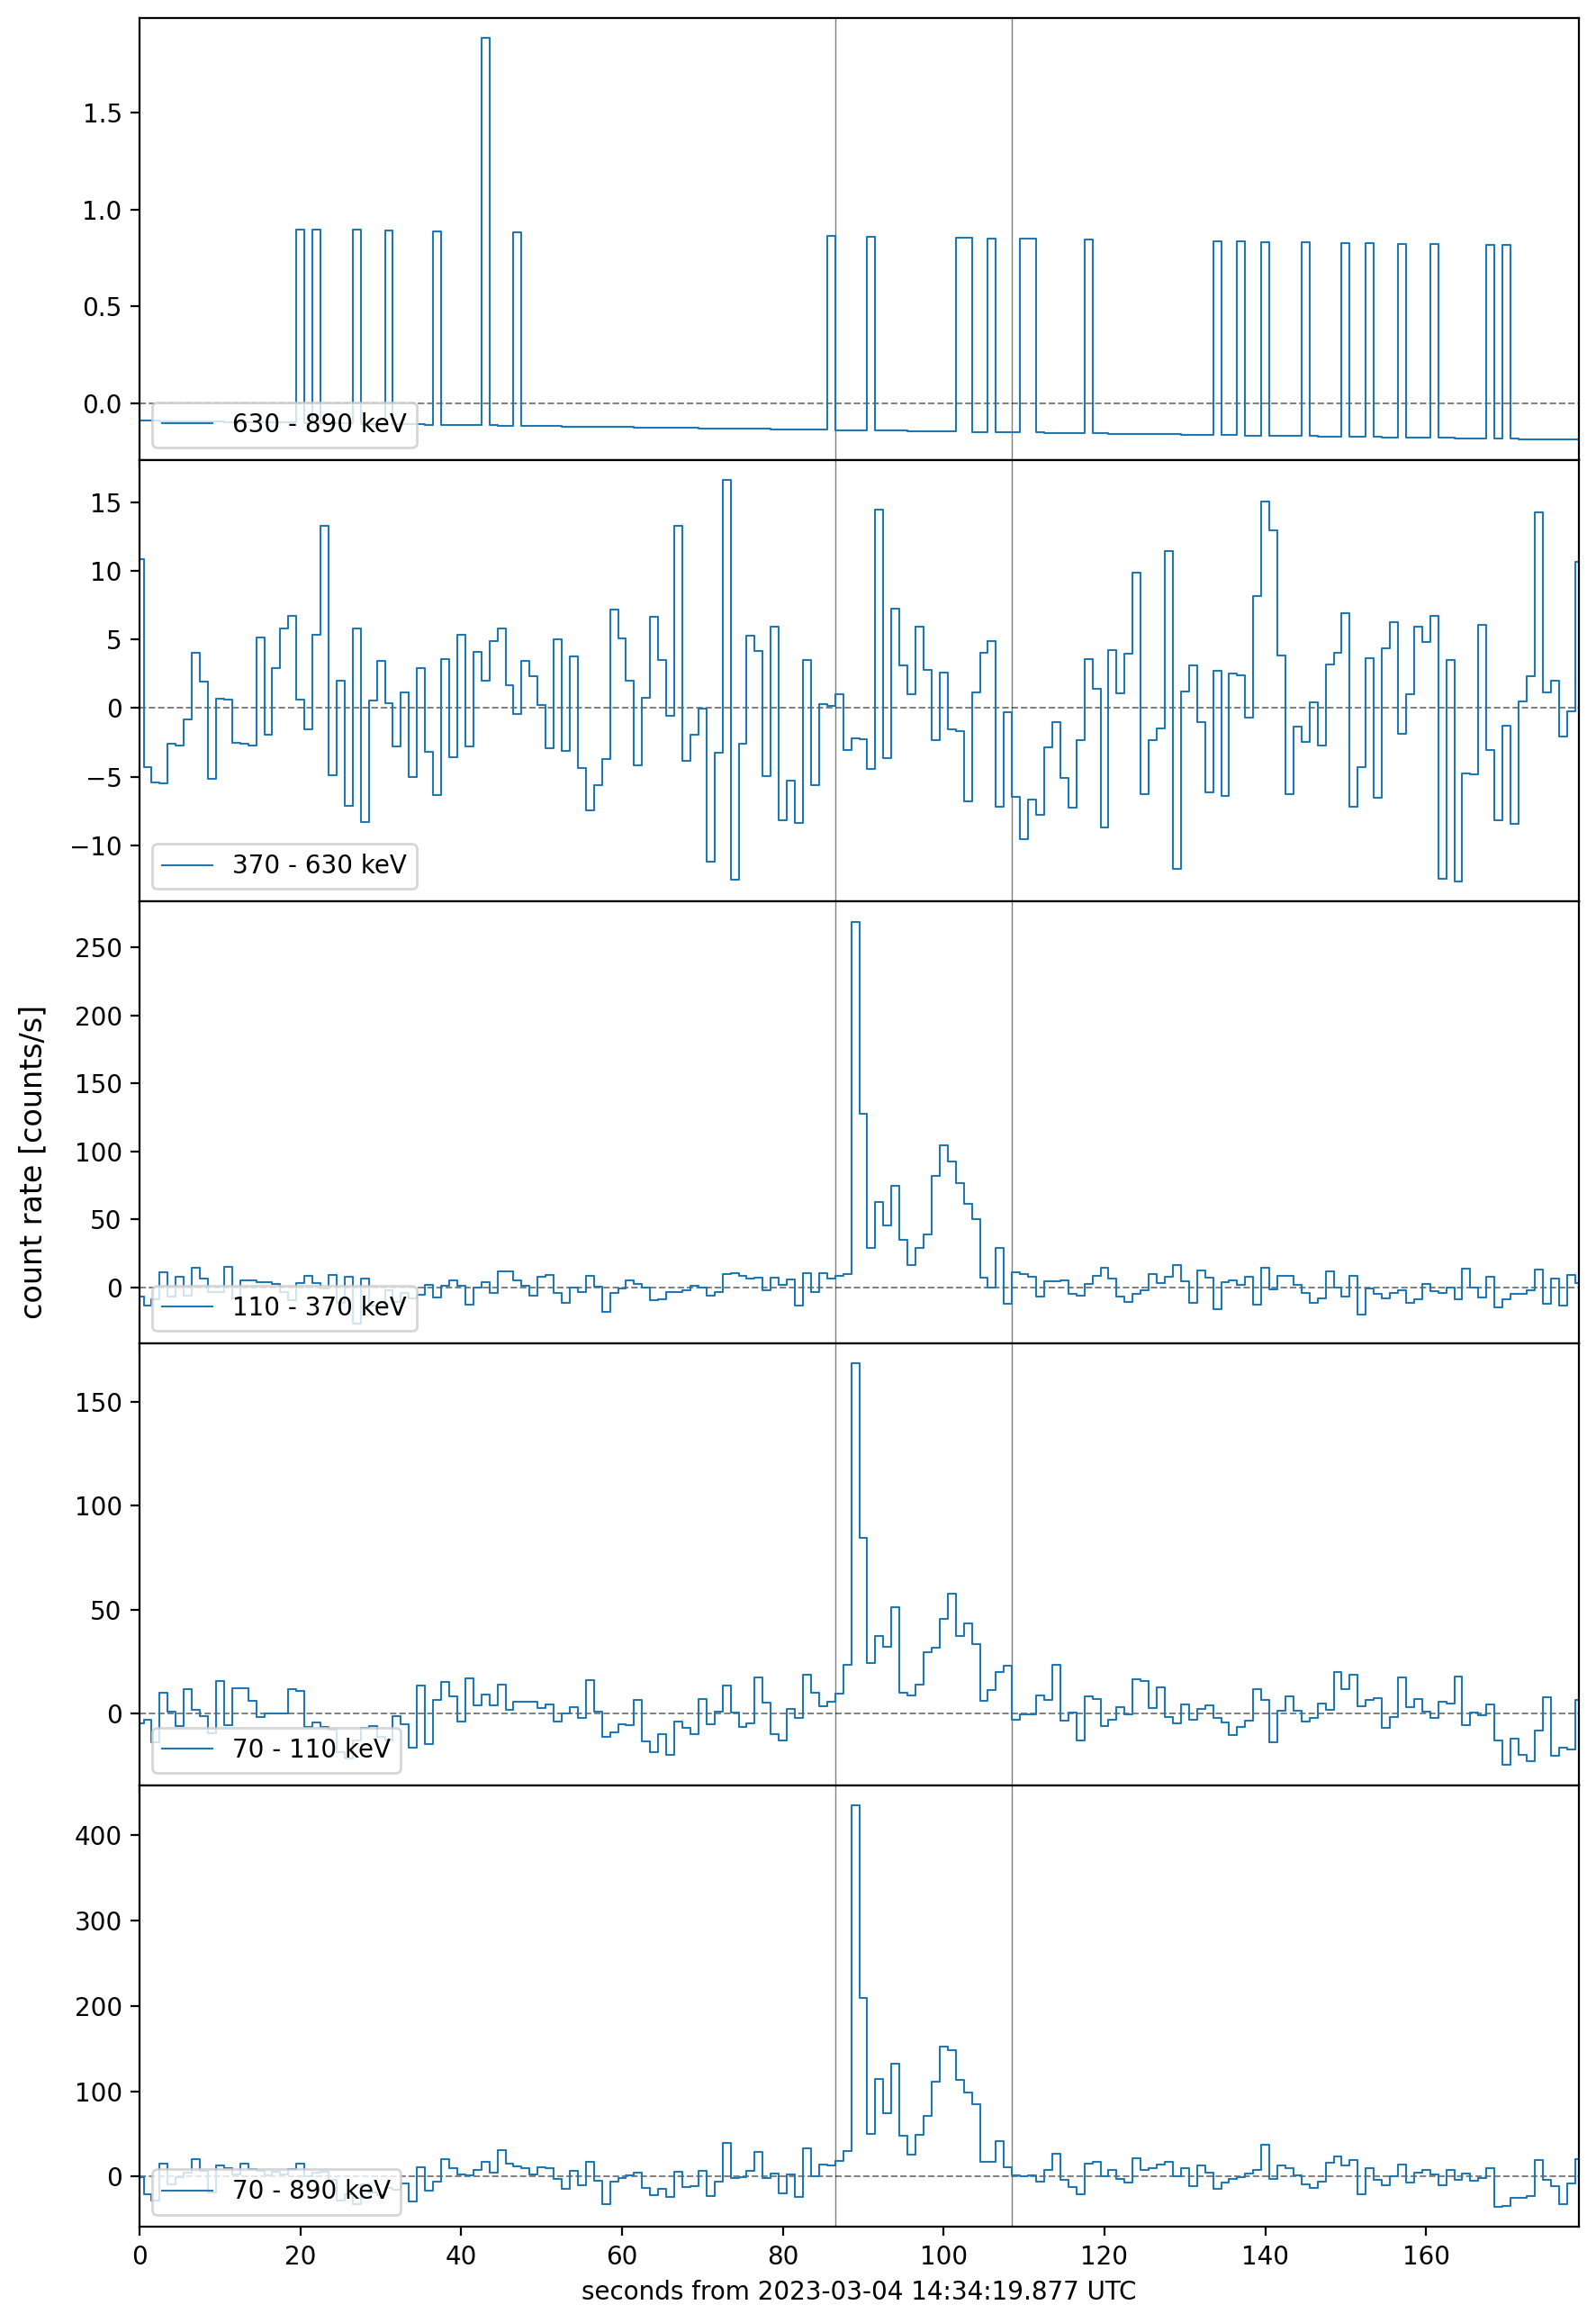

In [5]:
# define filepath and observation
filepath = '../data/r23c04b_40448.json'
obs = Observation(filepath)

# define event parameters
event_time = '2023-03-04 14:35:49.140'
event_type = 'GRB-Fermi'

# plot data +- 1.5 min around trigger and return statistics 
obs.check_event(event_time=event_time,
                event_type=event_type,
                dtvalue_left=1.5, dtvalue_right=1.5,
                plot_fit=True,
                llim=87,rlim=109)

##### Further notes:
You can also save the output (statistics + light curves) using the *save_path* parameter of the *check_event* function. 

By default, the background fit is done by a linear function, but if needed, you can use *fit_function='polynom'* to fit the background by a second-order polynomial.

Should you choose to plot a larger interval, you may appreciate the *second_locator* parameter by which you can adjust the xticks and xlabels.


Once we have the file downloaded, it is also possible to create a skymap for this event without specifying satellite's coordinates. To do that, use the *skymap* function of the *Observation* class.

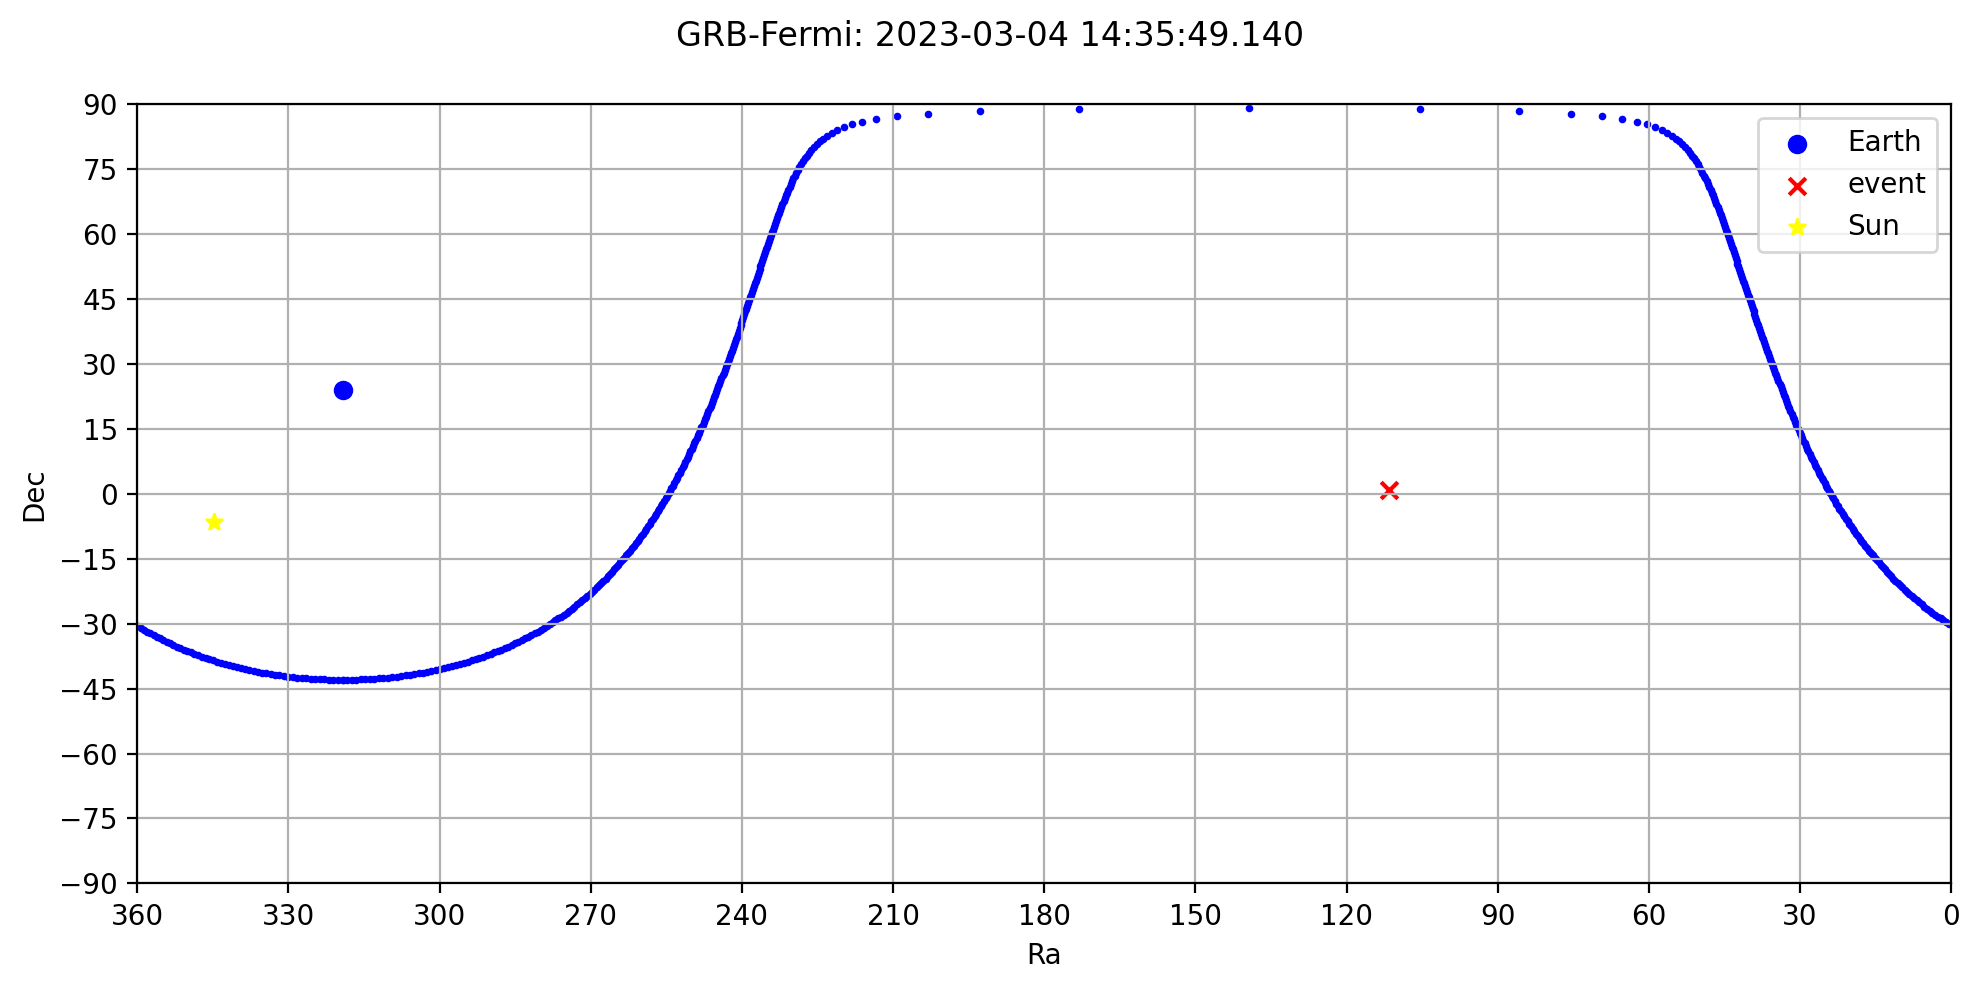

In [6]:
# GRB coordinates
ra_event = 111.660
dec_event = 0.900

# plot skymap with marked event
obs.skymap(event_time,event_type,ra_event,dec_event)